# Gaussian Mixture Model (GMM)

In [55]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Random State

random_s = 10

In [57]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/gaussian-demo-02.csv')
df.head()

,X,Y
0,0.496714,1.399355
1,-0.138264,0.924634
2,0.647689,0.059630
3,1.523030,-0.646937
4,-0.234153,0.698223


In [58]:
# Scaled

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.52692164, 0.70754818],
       [0.4374124 , 0.63014995],
       [0.54820363, 0.48912054],
       ...,
       [0.54723863, 0.33561837],
       [0.37638692, 0.45281216],
       [0.5376164 , 0.35795017]])

In [59]:
# Reconstruct to a dataframe

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.tail(3)

,X,Y
997,0.547239,0.335618
998,0.376387,0.452812
999,0.537616,0.357950


# Test for Gaussianity (Normal Distribution)

## Q-Q Plot

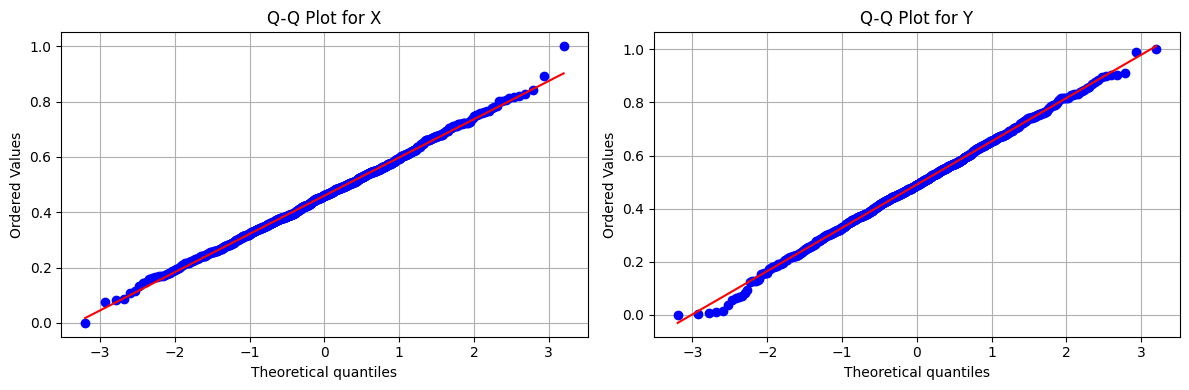

In [60]:
# Test for Gaussianity (Normal Distribution) using Q-Q Plot

import scipy.stats as stats

# Generate Q-Q plots for X and Y

plt.figure(figsize=(12, 4))

for i, feature in enumerate(['X', 'Y'], 1):

  plt.subplot(1, 2, i) # 1 row, 2 columns
  stats.probplot(df_scaled[feature], dist = 'norm', plot = plt)
  plt.grid()
  plt.title(f'Q-Q Plot for {feature}')

plt.tight_layout()
plt.show()

# if it follows the straight line, it is an acceptable Gaussian

## Shapiro - Wilk Test

In [61]:
# Perform Shapiro-Wilk test for normality on both columns

shapiro_test_x = stats.shapiro(df_scaled['X'])
shapiro_test_y = stats.shapiro(df_scaled['Y'])

shapiro_test_x, shapiro_test_y

# if p-value <= 0.05 (Non Gausssian)
# if p-values > 0.05 (Gaussian)

# Since the p-values for both columns are greater than the common significance level (e.g., 0.05),
# This indicates that the data in both columns can be considered normally distributed.

(ShapiroResult(statistic=0.9986092190571162, pvalue=0.6272578290246378),
 ShapiroResult(statistic=0.998763822973738, pvalue=0.731192977036669))

## Kolmogorov-Smirnov Test

In [62]:
# Perform the Kolmogorov-Smirnov test for normality on both columns

ks_test_x = stats.kstest(df_scaled['X'], 'norm', args=(df['X'].mean(), df_scaled['X'].std()))
ks_test_y = stats.kstest(df_scaled['Y'], 'norm', args=(df['Y'].mean(), df_scaled['Y'].std()))

ks_test_x, ks_test_y

# Since the p-values for both columns are greater than the common significance level (e.g., 0.05),
# This indicates that the data in both columns can be considered normally distributed.

(KstestResult(statistic=0.89656968866447, pvalue=0.0, statistic_location=0.24064751208300825, statistic_sign=-1),
 KstestResult(statistic=0.8088119549747433, pvalue=0.0, statistic_location=0.27815127073632767, statistic_sign=-1))

## Skewness Test

In [63]:
# Calculate skewness for both columns

skewness_x = stats.skew(df_scaled['X'])
skewness_y = stats.skew(df_scaled['Y'])

skewness_x, skewness_y

# A skewness value between -1 and +1 is excellent, while -2 to +2 is generally acceptable.
# Values beyond -2 and +2 suggest substantial nonnormality (Hair et al., 2022, p. 66).

(0.11680083110533587, -0.04932177396529906)

## Kurtosis

In [64]:
# Calculate kurtosis for both columns

kurtosis_x = stats.kurtosis(df_scaled['X'])
kurtosis_y = stats.kurtosis(df_scaled['Y'])

kurtosis_x, kurtosis_y

# Both values are very close to zero, indicating that the distributions of both columns exhibit near-normal kurtosis,
# meaning they have tails similar to a normal distribution.

# The values for asymmetry and kurtosis between -2 and +2 are considered
# acceptable in order to prove normal univariate distribution (George & Mallery, 2010).

(0.06620589292148571, 0.05211754569783977)

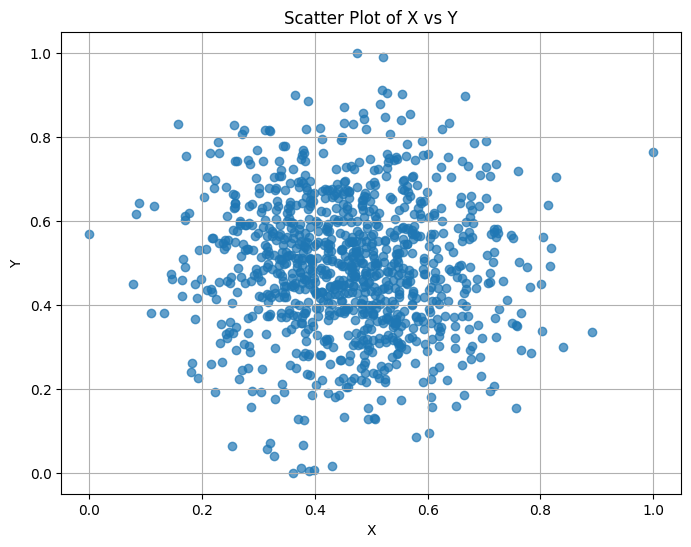

In [65]:
# Visualize the Data

# Create a scatter plot of the original data (X vs Y)

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['X'], df_scaled['Y'], alpha=0.7)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# GMM Modeling

In [66]:
# Fit GMM models for a range of cluster counts and compute BIC and AIC

from sklearn.mixture import GaussianMixture

n_clusters_range = range(1, 11)  # Try 1 to 10 clusters

bic_scores = []
aic_scores = []

for n_clusters in n_clusters_range:

    gmm = GaussianMixture(n_components = n_clusters, random_state = random_s)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))

# Return the BIC and AIC scores for each number of clusters

bic_scores, aic_scores

# BIC SCORE:
# The Bayesian Information Criterion (BIC) is a statistical criterion used for model selection,
# helping you to compare different models and choose the one that best fits the data while
# balancing model complexity. The BIC score considers both how well the model fits the data and
# the number of parameters in the model, penalizing models that are too complex.

# Interpreting the BIC Score
# Lower BIC values indicate better models, but it's important to compare BIC scores across models.
# A smaller BIC suggests a better model, as it either fits the data better or has fewer parameters.

# The optimal number of clusters is where the BIC score is the lowest,
# balancing goodness of fit with model complexity.

# AIC SCORE:
# The Akaike Information Criterion (AIC) is a measure used to evaluate how well a statistical model fits a dataset while
# considering the complexity of the model. In the context of Gaussian Mixture Models (GMM),
# the AIC score helps you decide how many clusters (Gaussian components) you should use to model your data.

([-1886.4737341084892,
  -1844.5288041548895,
  -1810.1481403328135,
  -1769.8736630981703,
  -1731.3139167114598,
  -1696.2679882516538,
  -1657.9934956616917,
  -1621.224953459714,
  -1588.3543486917417,
  -1550.6023420832971],
 [-1911.0125105033999,
  -1898.514112223693,
  -1893.5799800755099,
  -1882.7520345147593,
  -1873.6388198019417,
  -1868.0394230160286,
  -1859.2114620999594,
  -1851.8894515718744,
  -1848.465378477795,
  -1840.1599035432432])

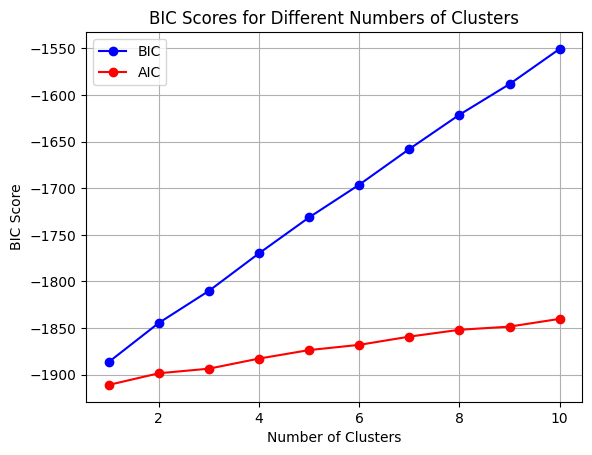

In [67]:
# Visualized the Scores
# Plot BIC scores to find the optimal number of clusters

plt.plot(n_clusters_range, bic_scores, marker='o', color = 'blue', label = 'BIC')
plt.plot(n_clusters_range, aic_scores, marker='o', color = 'red', label = 'AIC')
plt.title('BIC Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.grid(True)
plt.legend()
plt.show()

In [68]:
# Calculate silhouette scores for GMM models with 2, 3, 4, and 5 clusters

from sklearn.metrics import silhouette_score

silhouette_scores = {}

for n_clusters in [2, 3, 4, 5, 6, 7, 8]:

    # Fit GMM with n_clusters
    gmm = GaussianMixture(n_components = n_clusters, random_state = random_s)
    labels = gmm.fit_predict(df_scaled)

    # Calculate the silhouette score
    score = silhouette_score(df_scaled, labels)
    silhouette_scores[n_clusters] = score

silhouette_scores

# Silhouette Score is more intuitive and often reliable for clusters that are spherical,
# evenly distributed, and not too dense or sparse.

{2: 0.33268655369007183,
 3: 0.2944736563543233,
 4: 0.29098772024827635,
 5: 0.2966274063251087,
 6: 0.3071134898882236,
 7: 0.29978931878692683,
 8: 0.30526429856612797}

In [69]:
# Using Davies-Bouldin Score

from sklearn.metrics import davies_bouldin_score

# Try GMM with different numbers of clusters and calculate DBI

dbi_scores = []
n_clusters_range = [2, 3, 4, 5, 6]

for n in n_clusters_range:

    gmm = GaussianMixture(n_components = n, random_state = random_s)
    labels = gmm.fit_predict(df_scaled)
    score = davies_bouldin_score(df_scaled, labels)
    dbi_scores.append(score)
    print(f"Number of Clusters: {n}, DBI: {score}")

# Find the number of clusters with the lowest DBI
best_n_clusters_dbi = n_clusters_range[np.argmin(dbi_scores)]
print(f"\nBest number of clusters according to DBI: {best_n_clusters_dbi}")

# Davies-Bouldin Score can be more appropriate when clusters are not spherical or when they have varying densities.
# It can handle more irregular shapes and still produce a meaningful evaluation.

Number of Clusters: 2, DBI: 1.143408038737466
Number of Clusters: 3, DBI: 1.075579722710992
Number of Clusters: 4, DBI: 1.0659901032753034
Number of Clusters: 5, DBI: 0.9624169333182117
Number of Clusters: 6, DBI: 0.9091916386726648

Best number of clusters according to DBI: 6


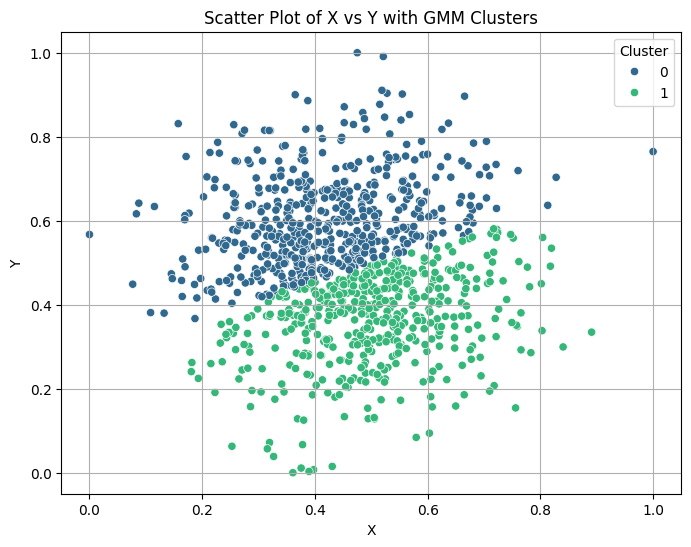

In [70]:
# Apply GMM with n components

gmm = GaussianMixture(n_components = 2, random_state = random_s)
gmm.fit(df_scaled)

# Predict the cluster labels
df_scaled['Cluster'] = pd.DataFrame(gmm.predict(df_scaled))
# df_scaled['Cluster'] = df_scaled['Cluster'].apply(lambda x: f'Cluster {x}')

# Plot the scatter plot with GMM clusters
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df_scaled['X'], y = df_scaled['Y'], data = df_scaled, palette = 'viridis', hue = 'Cluster')

plt.title('Scatter Plot of X vs Y with GMM Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

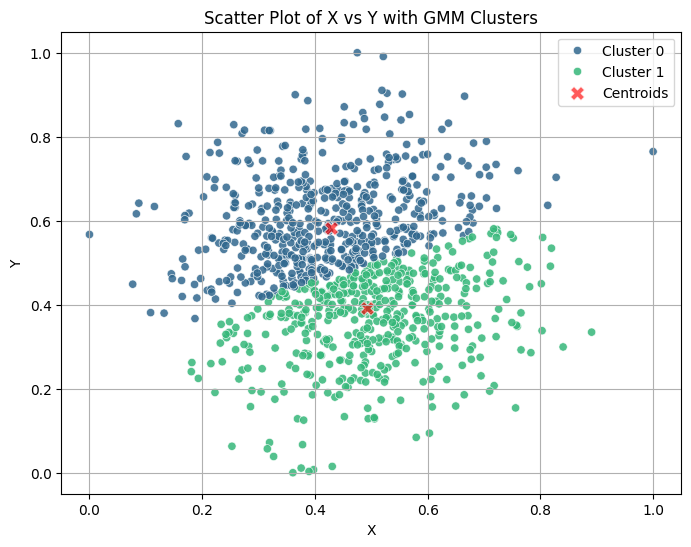

In [71]:
# Get the GMM centroids (means of the Gaussian components)

centroids = gmm.means_
centroids

df_scaled['Cluster'] = df_scaled['Cluster'].apply(lambda x: f'Cluster {x}')

# Plot the scatter plot with GMM clusters
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df_scaled['X'], y = df_scaled['Y'], data = df_scaled, hue = 'Cluster', palette = 'viridis', alpha = 0.85)
sns.scatterplot(x = centroids[:, 0], y = centroids[:, 1], c = 'red', marker = 'X', s = 100, label = 'Centroids', alpha = 0.65)

plt.title('Scatter Plot of X vs Y with GMM Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()